Plotting the data with training data in red and test data in blue


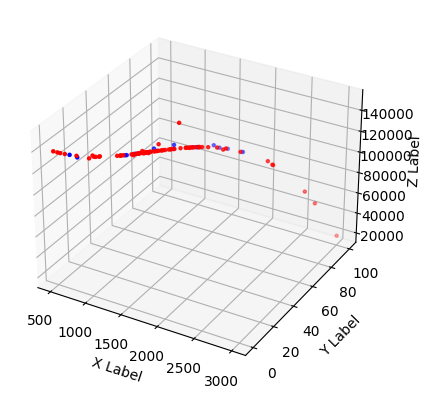

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from time import sleep

#this cell extracts data and puts into the dataframes

# X- 0-3000 (500)
# Y- 0-150 (20)
# Z- 0-140000 (20000)


#polynomial regression functions
def get_beta(mat, tz):
    return np.linalg.pinv(mat).dot(tz)

def get_z(input, beta):
    return input.dot(beta)

def get_error(z_pred, z):
    ans = np.sum((z_pred - z)**2)
    return ans/len(z)
####### end of functions

# Load data from CSV file into Pandas DataFrame
data = pd.read_csv('train_2_1.csv').values
test_data = pd.read_csv('test_2_1.csv').values
ndata = data
#as the data in csv is alraedy shuffled, we can just take the first 20% as validation data
vdata = ndata[:int(len(ndata)*0.2)]
tdata = ndata[int(len(ndata)*0.2):]

#creating the figure object
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
tz = tdata[:,2]
vz = vdata[:,2]
test_z = test_data[:,2]
train_x = np.array([[i] for i in tdata[:,0]])
train_y = np.array([[i] for i in tdata[:,1]])
train_z = np.array([[i] for i in tz])
valid_x = np.array([[i] for i in vdata[:,0]])
valid_y = np.array([[i] for i in vdata[:,1]])
valid_z = np.array([[i] for i in vz])
test_x = np.array([[i] for i in test_data[:,0]])
test_y = np.array([[i] for i in test_data[:,1]])
test_z = np.array([[i] for i in test_z])
train_mat = np.array(train_x**0)
valid_mat = np.array(valid_x**0)
test_mat = np.array(test_x**0)

#plotting the data
print("Plotting the data with training data in red and test data in blue")
ax.scatter(data[:,0], data[:,1], data[:,2],color='red',marker='.', label='Train Data')
ax.scatter(test_data[:,0], test_data[:,1], test_data[:,2],color='blue', label='Test Data',marker='.')
# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# Show the plot
plt.show()

# print(test_z.shape)
# print(train_mat.shape)
# print(plot_mat.shape)




degree:  1


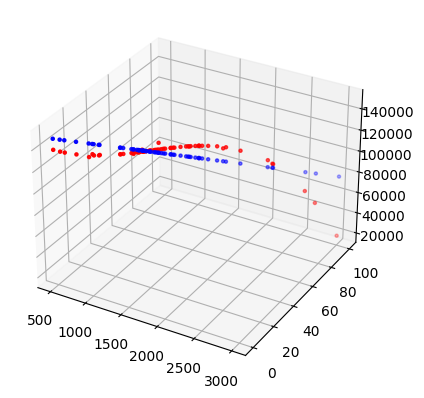

degree:  2


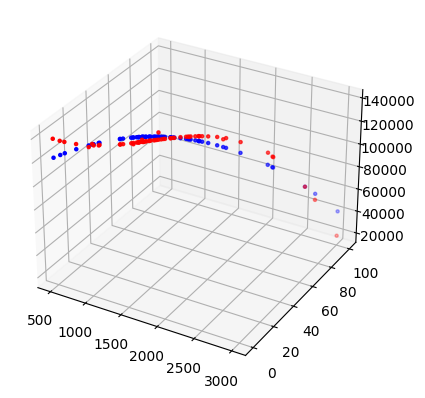

degree:  3


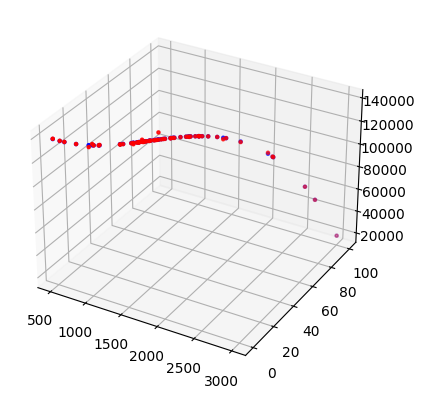

degree:  4


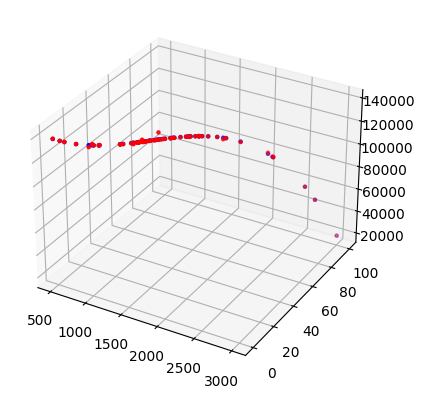

degree:  5


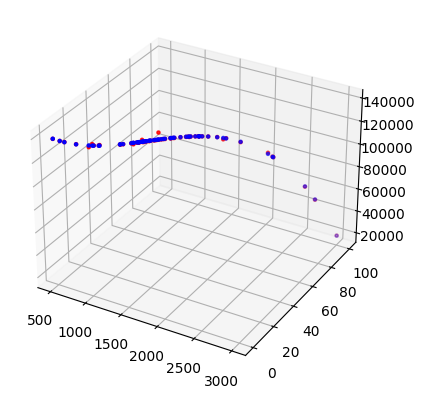

degree:  6


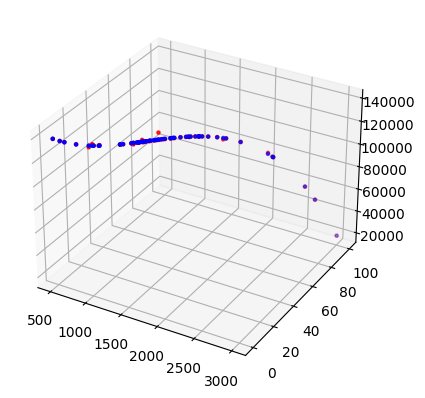

degree:  7


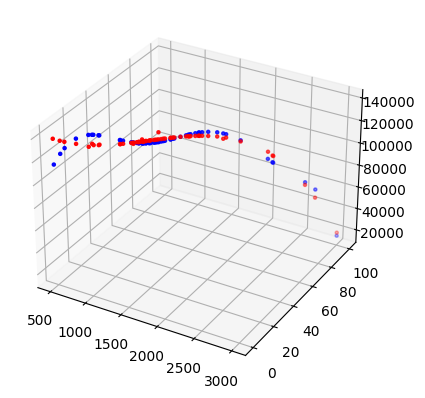

degree:  8


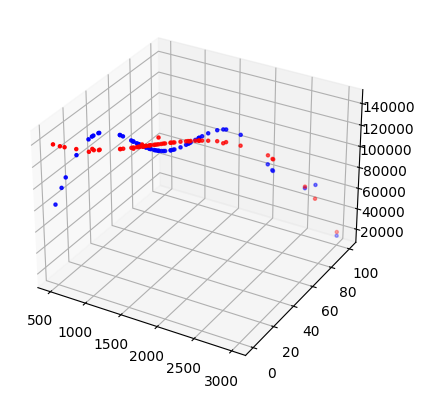

degree:  9


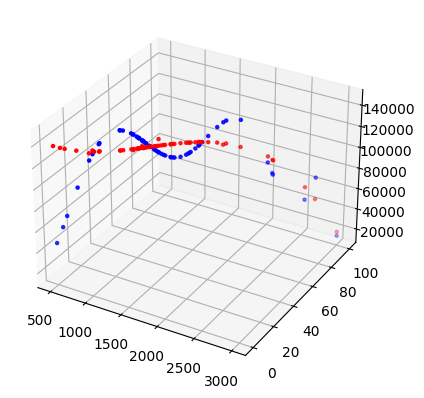

In [140]:
test_error = []
valid_error = []
train_error=[]
x=[]

# print(train_mat.shape)

# print(train_mat.shape)
for n in range(1, 10):
    x.append(n)
    for i in range(n+1):
        # print(i,j)
        j=n-i
        train_mat = np.append(train_mat, np.array(train_x**(i)*train_y**(j)), axis=1)
        valid_mat = np.append(valid_mat, np.array(valid_x**(i)*valid_y**(j)), axis=1)
        test_mat = np.append(test_mat, np.array(test_x**(i)*test_y**(j)), axis=1)
    # print(train_mat.shape)
    # print(train_mat[0])
    beta = get_beta(train_mat, train_z)
    train_z_pred = get_z(train_mat, beta)
    valid_z_pred = get_z(valid_mat, beta)
    test_z_pred = get_z(test_mat, beta)
    print("degree: ", n)
    
    fig = plt.figure()
    ax = fig.add_subplot( projection='3d')
    ax.scatter(tdata[:,0], tdata[:,1], tdata[:,2],color='red',marker='.', label='Train Data')
    ax.scatter(tdata[:,0], tdata[:,1], train_z_pred[:,0],color='blue',marker='.', label='pred Data')
    plt.show()
    valid_error.append(get_error(valid_z_pred, valid_z))
    test_error.append(get_error(test_z_pred, test_z))
    train_error.append(get_error(train_z_pred, train_z))
    


PLotting MSe vs degree with validation error in blue, test error in red and train error in green


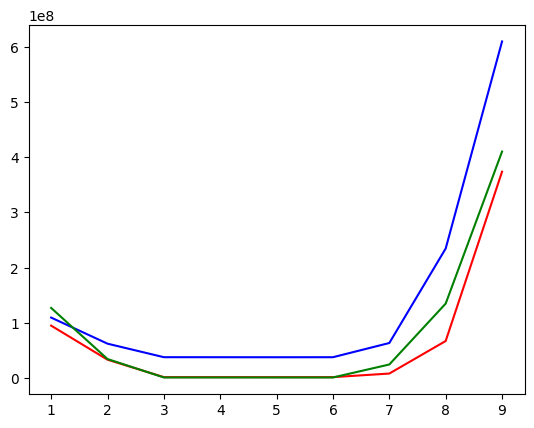

min valid error at [5]
min test error at [5]
min train error at [6]


In [141]:
print("PLotting MSe vs degree with validation error in blue, test error in red and train error in green")
plt.plot(x, valid_error, label='validation error', color='blue')
plt.plot(x, test_error, label='test error', color='red')
plt.plot(x, train_error, label='train error', color='green')

plt.show()
# print(valid_error)

min_valid = min(valid_error)
ans1=[]
for i in range(len(valid_error)):
    if valid_error[i] == min_valid:
        ans1.append(x[i])
print("min valid error at",ans1)

min_test = min(test_error)
ans2=[]
for i in range(len(test_error)):
    if test_error[i] == min_test:
        ans2.append(x[i])
print("min test error at",ans2)

min_train = min(train_error)
ans3=[]
for i in range(len(train_error)):
    if train_error[i] == min_train:
        ans3.append(x[i])
print("min train error at",ans3)



In [142]:
#taking best fitting at degree 5

print("best degree: ", 5)
print("MSE train error: ", train_error[4],"at degree 5")
print("MSE valid error: ", valid_error[4], "at degree 5")
print("MSE test error: ", test_error[4], "at degree 5")

best degree:  5
MSE train error:  754610.9608076443 at degree 5
MSE valid error:  37447644.153539486 at degree 5
MSE test error:  1354728.8912767798 at degree 5


plotting for degree 5, expected(red) vs predicted(blue) for train data


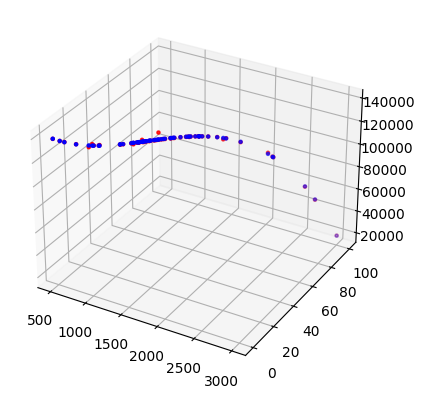

plotting for degree 5, expected(red) vs predicted(blue) for validation data


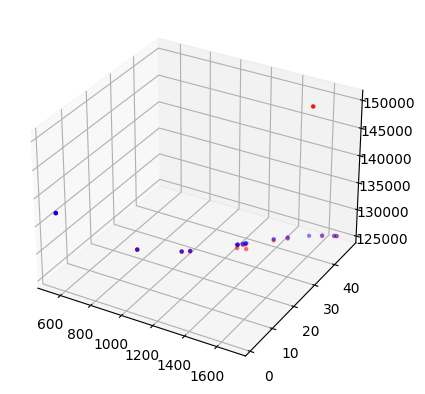

plotting for degree 5, expected(red) vs predicted(blue) for test data


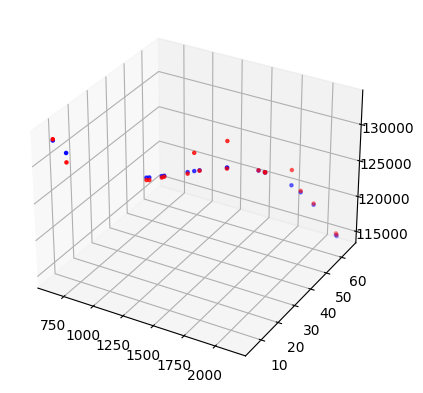

In [143]:
train_mat = np.array(train_x**0)
valid_mat = np.array(valid_x**0)
test_mat = np.array(test_x**0)


for n in range(1, 6):
    x.append(n)
    for i in range(n+1):
        # print(i,j)
        j=n-i
        train_mat = np.append(train_mat, np.array(train_x**(i)*train_y**(j)), axis=1)
        valid_mat = np.append(valid_mat, np.array(valid_x**(i)*valid_y**(j)), axis=1)
        test_mat = np.append(test_mat, np.array(test_x**(i)*test_y**(j)), axis=1)
    # print(train_mat.shape)
    # print(train_mat[0])

beta = get_beta(train_mat, train_z)
train_z_pred = get_z(train_mat, beta)
valid_z_pred = get_z(valid_mat, beta)
test_z_pred = get_z(test_mat, beta)

print("plotting for degree 5, expected(red) vs predicted(blue) for train data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(tdata[:,0], tdata[:,1], tdata[:,2],color='red',marker='.', label='Train Data')
ax.scatter(tdata[:,0], tdata[:,1], train_z_pred[:,0],color='blue',marker='.', label='pred Data')
plt.show()

print("plotting for degree 5, expected(red) vs predicted(blue) for validation data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(vdata[:,0], vdata[:,1], vdata[:,2],color='red',marker='.', label='Train Data')
ax.scatter(vdata[:,0], vdata[:,1], valid_z_pred[:,0],color='blue',marker='.', label='pred Data')
plt.show()


print("plotting for degree 5, expected(red) vs predicted(blue) for test data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(test_data[:,0], test_data[:,1], test_data[:,2],color='red',marker='.', label='Train Data')
ax.scatter(test_data[:,0], test_data[:,1], test_z_pred[:,0],color='blue',marker='.', label='pred Data')
plt.show()